In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
#DO NOT RUN ALL THE CODE! LAST CODE TAKES A LOT OF RAM
df=pd.read_csv('SampleSuperstore.csv')

In [61]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


## Checking The Dataset

In [62]:
df.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [64]:
df.shape

(9994, 13)

In [65]:
#np.unique(df['City'])
#np.unique(df['State'])
np.unique(df['Ship Mode'])
#np.unique(df['Category'])

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

## Selections

In [66]:
df_state = df['State']
df_profit = df['Profit']
df_state
df_profit


0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64

In [67]:
df_vermont=df[df['State']=='Vermont']
df_vermont

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2234,Standard Class,Corporate,United States,Burlington,Vermont,5408,East,Technology,Accessories,205.03,7,0.0,67.6599
5274,Second Class,Consumer,United States,Burlington,Vermont,5408,East,Furniture,Chairs,715.20,3,0.0,178.8000
8798,Standard Class,Home Office,United States,Burlington,Vermont,5408,East,Technology,Phones,1294.75,5,0.0,336.6350
9146,Standard Class,Corporate,United States,Burlington,Vermont,5408,East,Technology,Accessories,99.98,2,0.0,42.9914
9147,Standard Class,Corporate,United States,Burlington,Vermont,5408,East,Office Supplies,Art,8.04,6,0.0,2.7336
9148,Standard Class,Corporate,United States,Burlington,Vermont,5408,East,Office Supplies,Storage,1564.29,13,0.0,406.7154
9386,Standard Class,Consumer,United States,Burlington,Vermont,5408,East,Office Supplies,Paper,79.92,4,0.0,37.5624
9387,Standard Class,Consumer,United States,Burlington,Vermont,5408,East,Office Supplies,Paper,12.28,1,0.0,5.7716
9388,Standard Class,Consumer,United States,Burlington,Vermont,5408,East,Office Supplies,Appliances,542.94,3,0.0,152.0232
9389,Standard Class,Consumer,United States,Burlington,Vermont,5408,East,Office Supplies,Envelopes,2.04,1,0.0,0.9588


In [68]:
df_colorado=df[df['State']=='Colorado']
df_colorado

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
103,Standard Class,Consumer,United States,Aurora,Colorado,80013,West,Technology,Accessories,238.896,6,0.2,-26.8758
104,Standard Class,Consumer,United States,Aurora,Colorado,80013,West,Furniture,Furnishings,102.360,3,0.2,-3.8385
105,Standard Class,Consumer,United States,Aurora,Colorado,80013,West,Office Supplies,Binders,36.882,3,0.7,-25.8174
201,First Class,Consumer,United States,Denver,Colorado,80219,West,Furniture,Tables,218.750,2,0.5,-161.8750
202,First Class,Consumer,United States,Denver,Colorado,80219,West,Office Supplies,Appliances,2.600,1,0.2,0.2925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9392,Same Day,Corporate,United States,Denver,Colorado,80219,West,Furniture,Chairs,582.336,8,0.2,-29.1168
9553,Standard Class,Corporate,United States,Broomfield,Colorado,80020,West,Furniture,Furnishings,68.432,7,0.2,8.5540
9900,Standard Class,Consumer,United States,Louisville,Colorado,80027,West,Office Supplies,Storage,237.096,3,0.2,20.7459
9901,Standard Class,Consumer,United States,Louisville,Colorado,80027,West,Furniture,Furnishings,22.752,3,0.2,7.1100


## Plots

In [69]:
#Sales in Ship Mode
fig = px.pie(df, values='Sales', names='Ship Mode')
fig.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Second Class'),
  Text(1, 0, 'Standard Class'),
  Text(2, 0, 'First Class'),
  Text(3, 0, 'Same Day')])

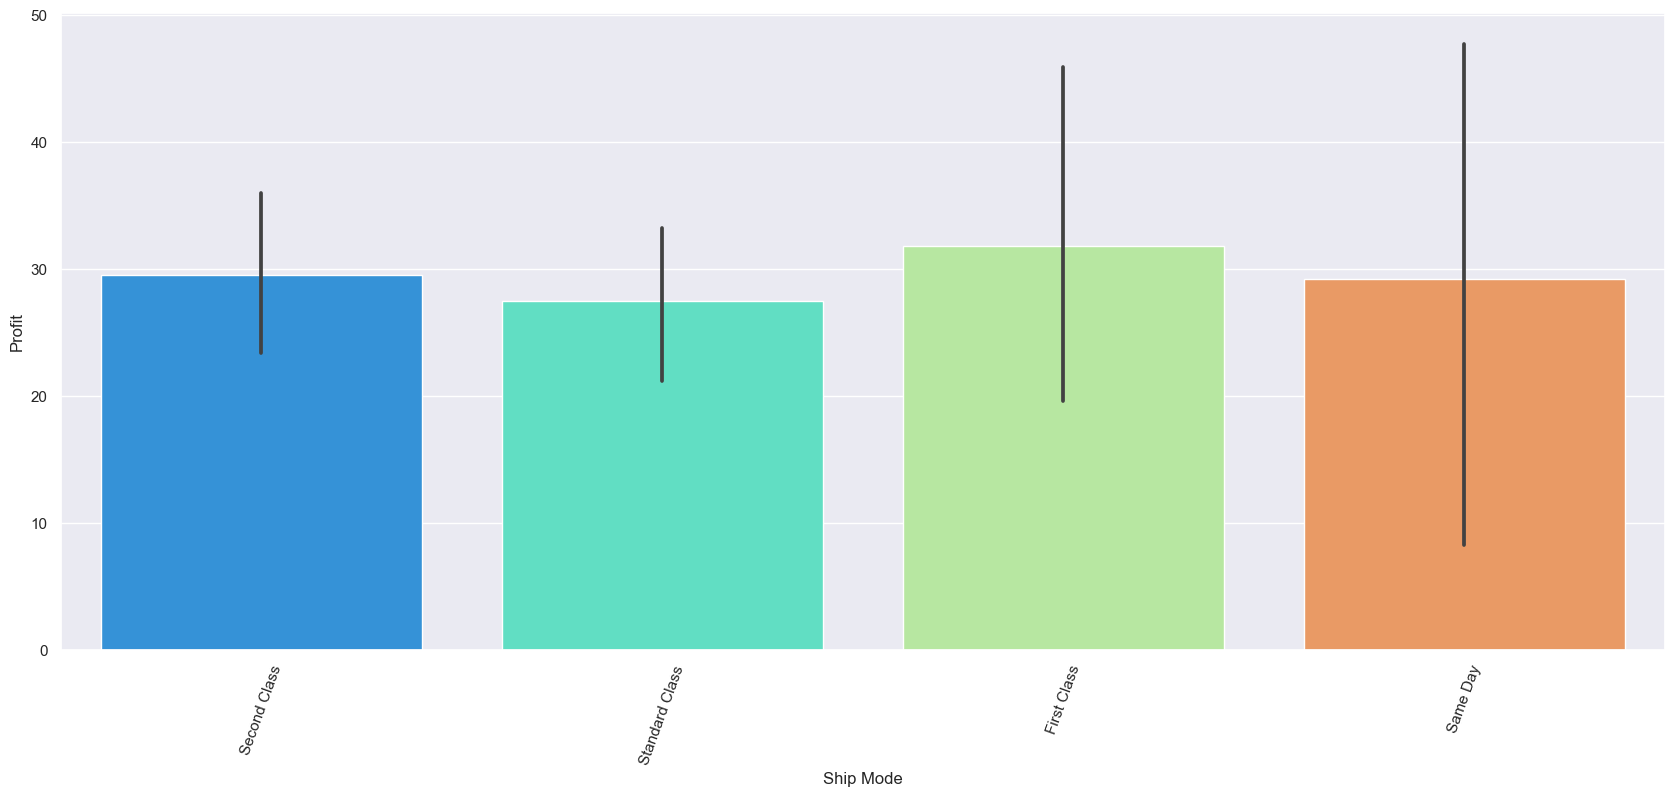

In [70]:
#Profit in Ship Mode
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.barplot(x="Ship Mode", y="Profit", data=df,palette='rainbow')
plt.xticks(rotation=70)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Second Class'),
  Text(1, 0, 'Standard Class'),
  Text(2, 0, 'First Class'),
  Text(3, 0, 'Same Day')])

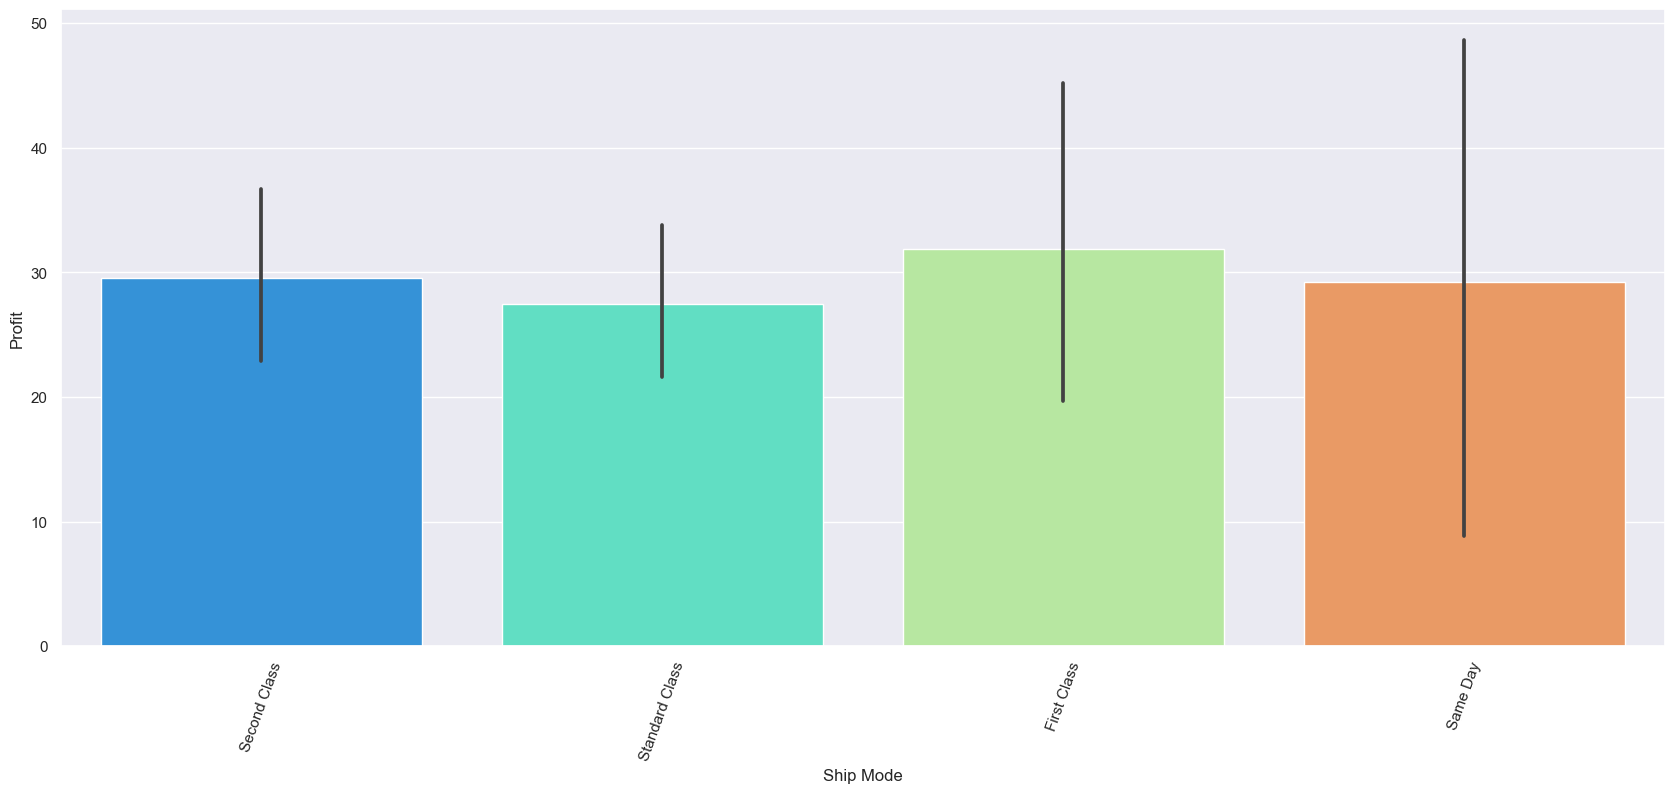

In [71]:
#Sales in Ship Mode
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.barplot(x="Ship Mode", y="Profit", data=df,palette='rainbow')
plt.xticks(rotation=70)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Central'),
  Text(3, 0, 'East')])

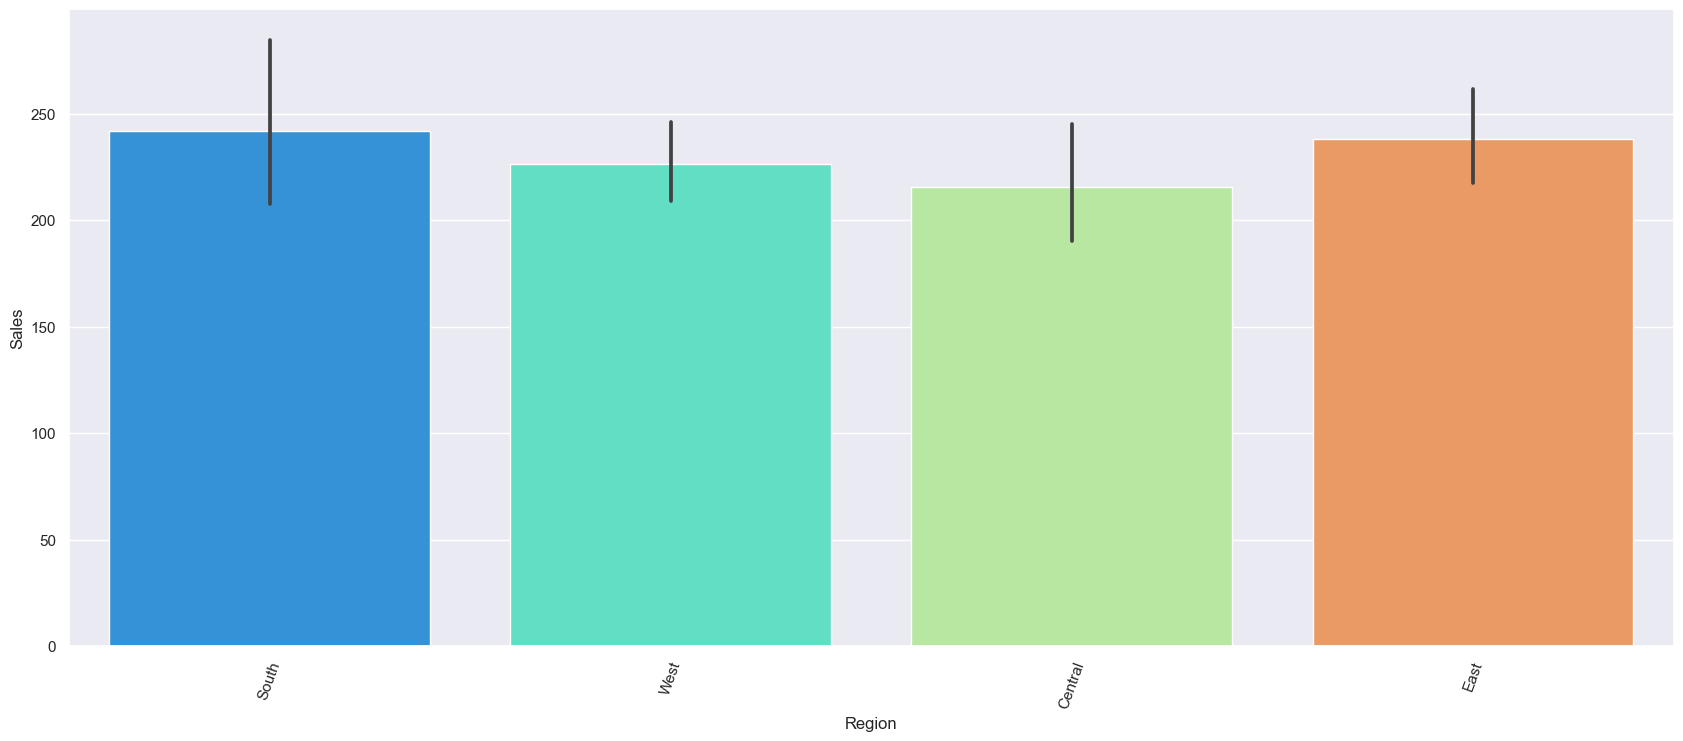

In [72]:
#Sales in Region
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.barplot(x="Region", y="Sales", data=df,palette='rainbow')
plt.xticks(rotation=70)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Central'),
  Text(3, 0, 'East')])

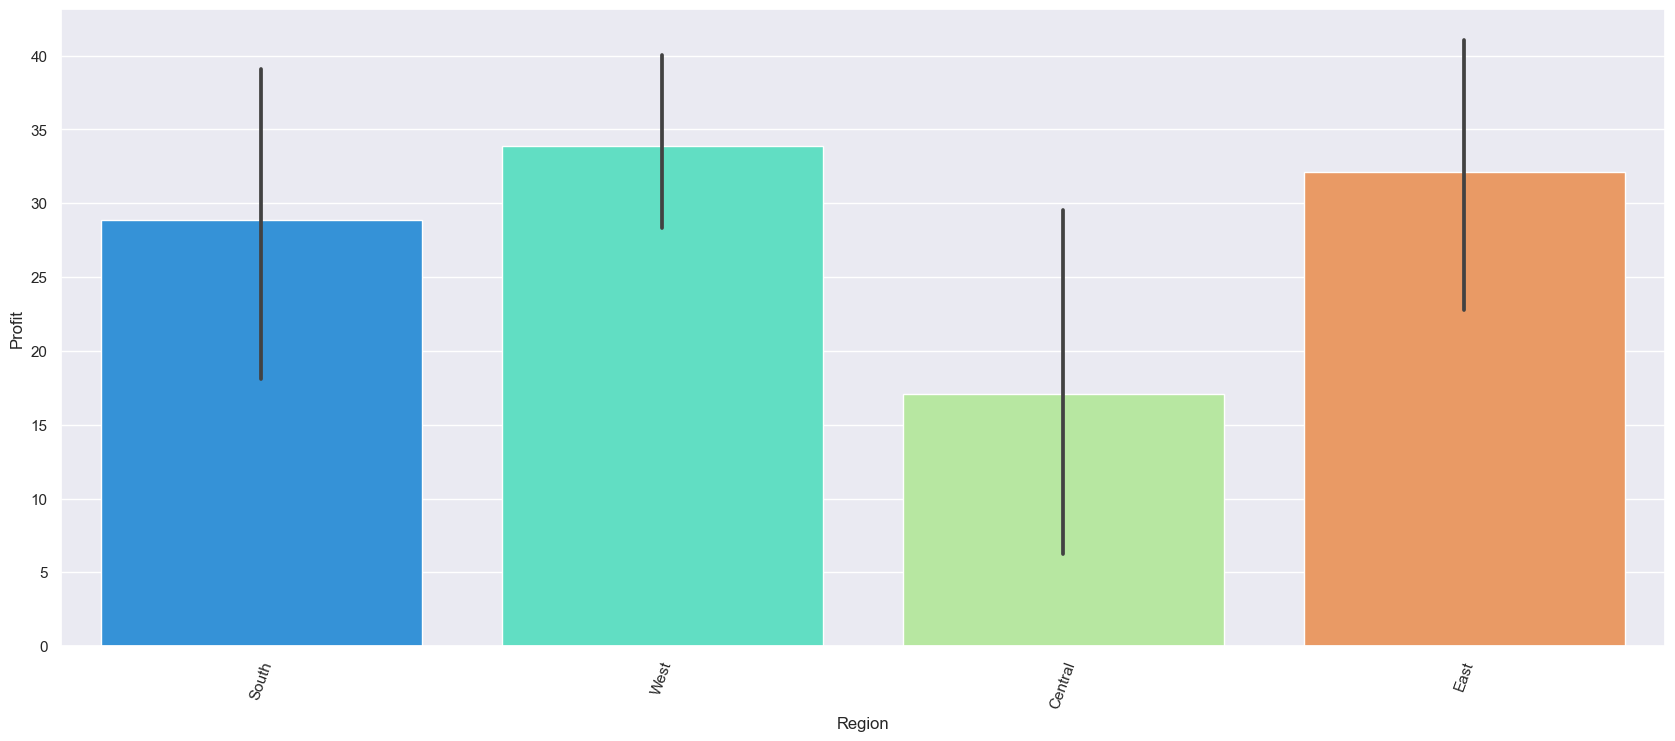

In [73]:
#Profit in Region
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.barplot(x="Region", y="Profit", data=df,palette='rainbow')
plt.xticks(rotation=70)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Central'),
  Text(3, 0, 'East')])

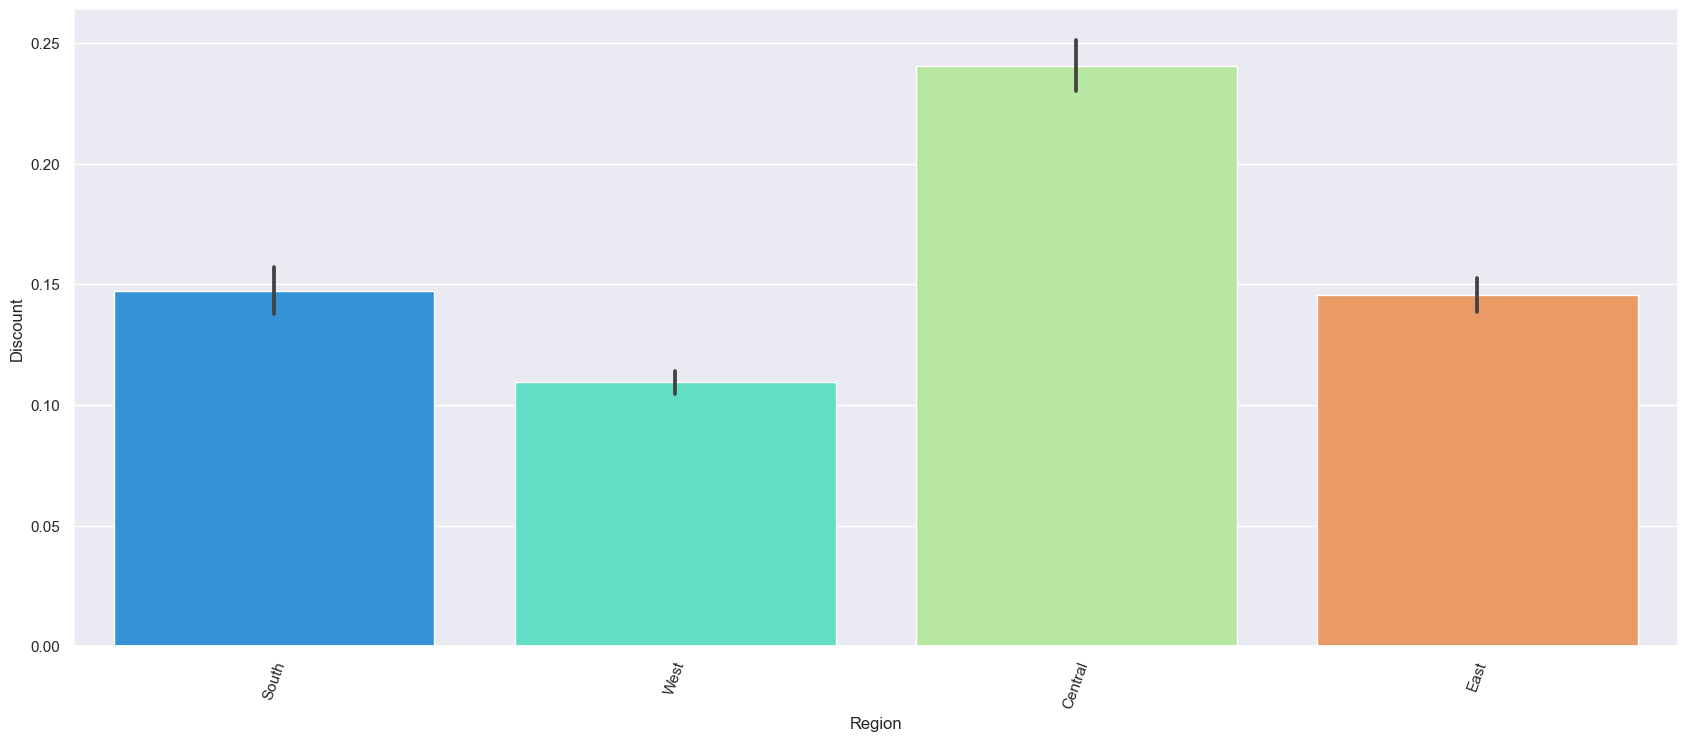

In [74]:
#Discount in Region
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.barplot(x="Region", y="Discount", data=df,palette='rainbow')
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Kentucky'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Florida'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Texas'),
  Text(6, 0, 'Wisconsin'),
  Text(7, 0, 'Utah'),
  Text(8, 0, 'Nebraska'),
  Text(9, 0, 'Pennsylvania'),
  Text(10, 0, 'Illinois'),
  Text(11, 0, 'Minnesota'),
  Text(12, 0, 'Michigan'),
  Text(13, 0, 'Delaware'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'New York'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Virginia'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Alabama'),
  Text(20, 0, 'South Carolina'),
  Text(21, 0, 'Oregon'),
  Text(22, 0, 'Colorado'),
  Text(23, 0, 'Iowa'),
  Text(24, 0, 'Ohio'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Oklahoma'),
  Text(27, 0, 'New Mexico'),
  Text(28, 0, 'Louisiana'),


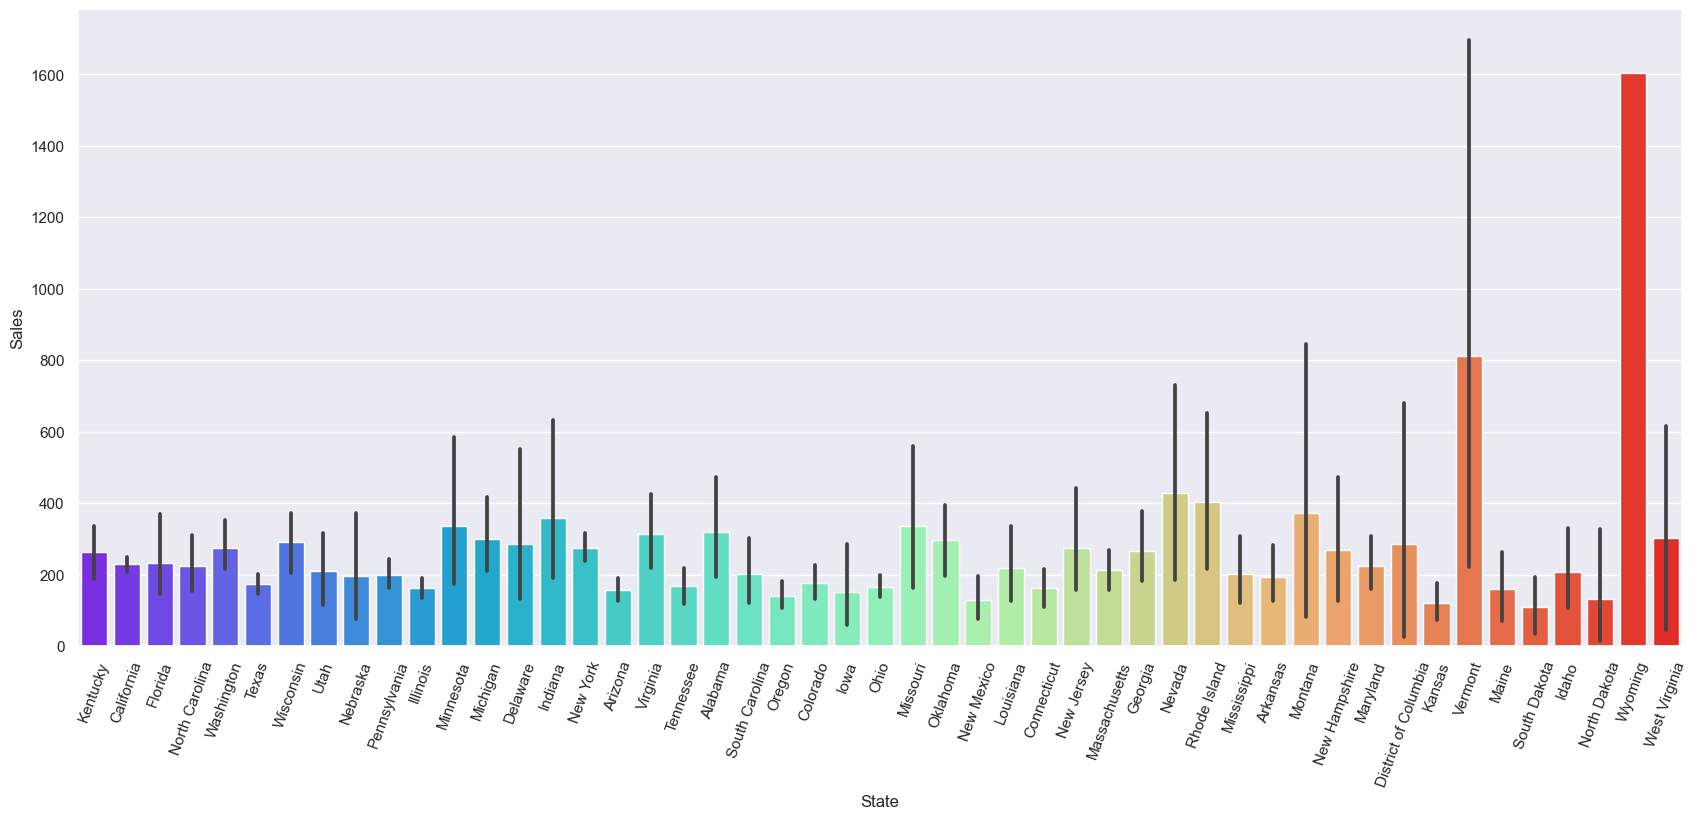

In [75]:
#Sales in States
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.barplot(x="State", y="Sales", data=df,palette='rainbow')
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Kentucky'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Florida'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Texas'),
  Text(6, 0, 'Wisconsin'),
  Text(7, 0, 'Utah'),
  Text(8, 0, 'Nebraska'),
  Text(9, 0, 'Pennsylvania'),
  Text(10, 0, 'Illinois'),
  Text(11, 0, 'Minnesota'),
  Text(12, 0, 'Michigan'),
  Text(13, 0, 'Delaware'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'New York'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Virginia'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Alabama'),
  Text(20, 0, 'South Carolina'),
  Text(21, 0, 'Oregon'),
  Text(22, 0, 'Colorado'),
  Text(23, 0, 'Iowa'),
  Text(24, 0, 'Ohio'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Oklahoma'),
  Text(27, 0, 'New Mexico'),
  Text(28, 0, 'Louisiana'),


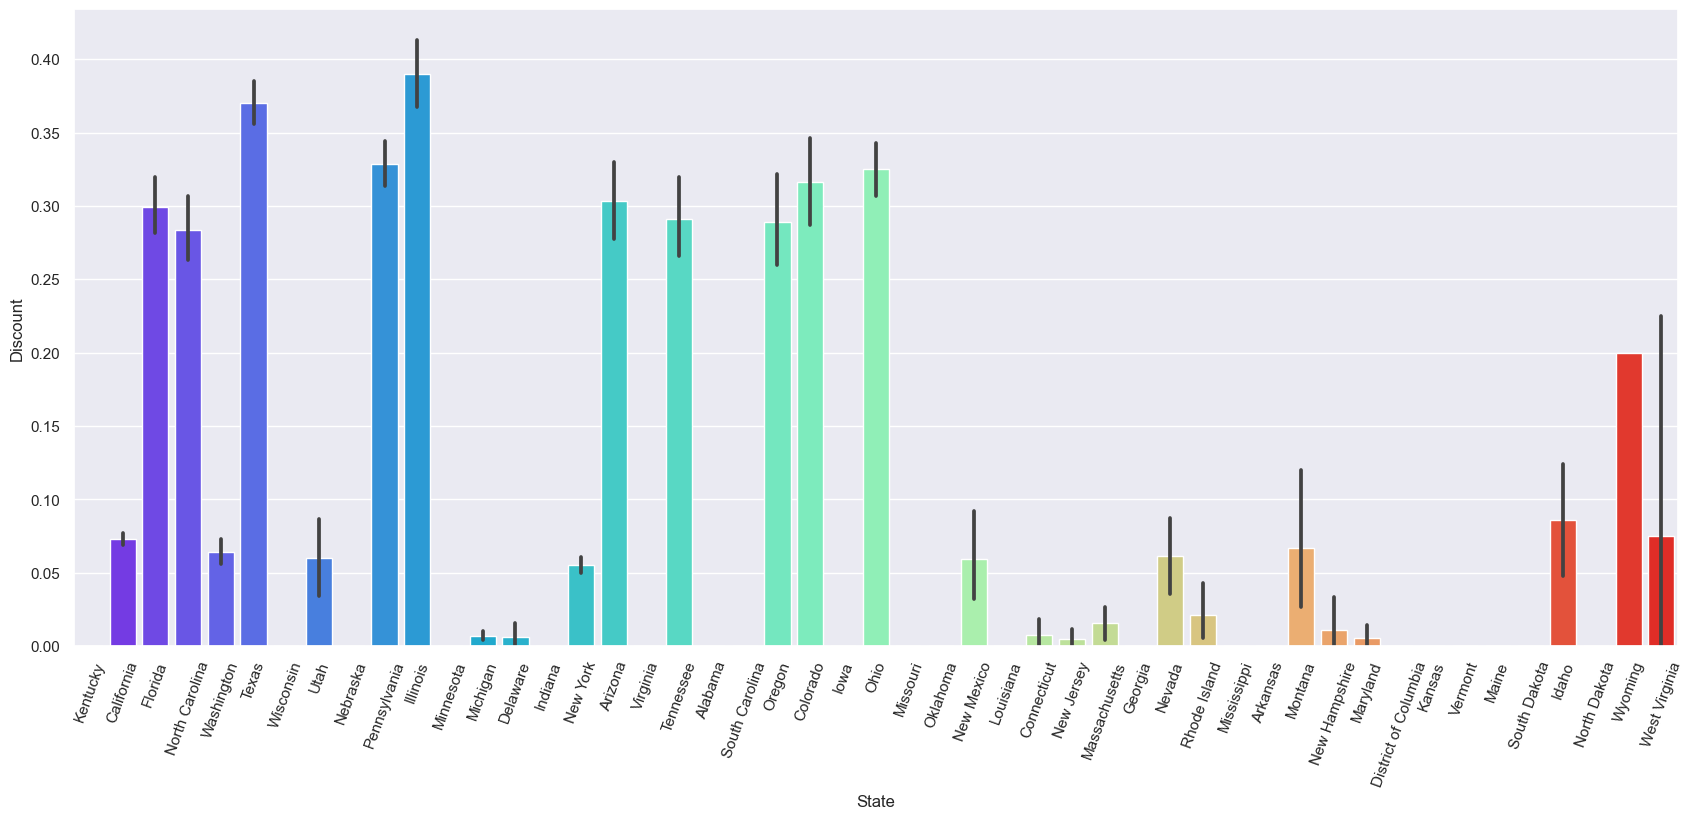

In [ ]:
#Discount in States
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.barplot(x="State", y="Discount", data=df,palette='rainbow')
plt.xticks(rotation=70)

(array([0, 1, 2]),
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

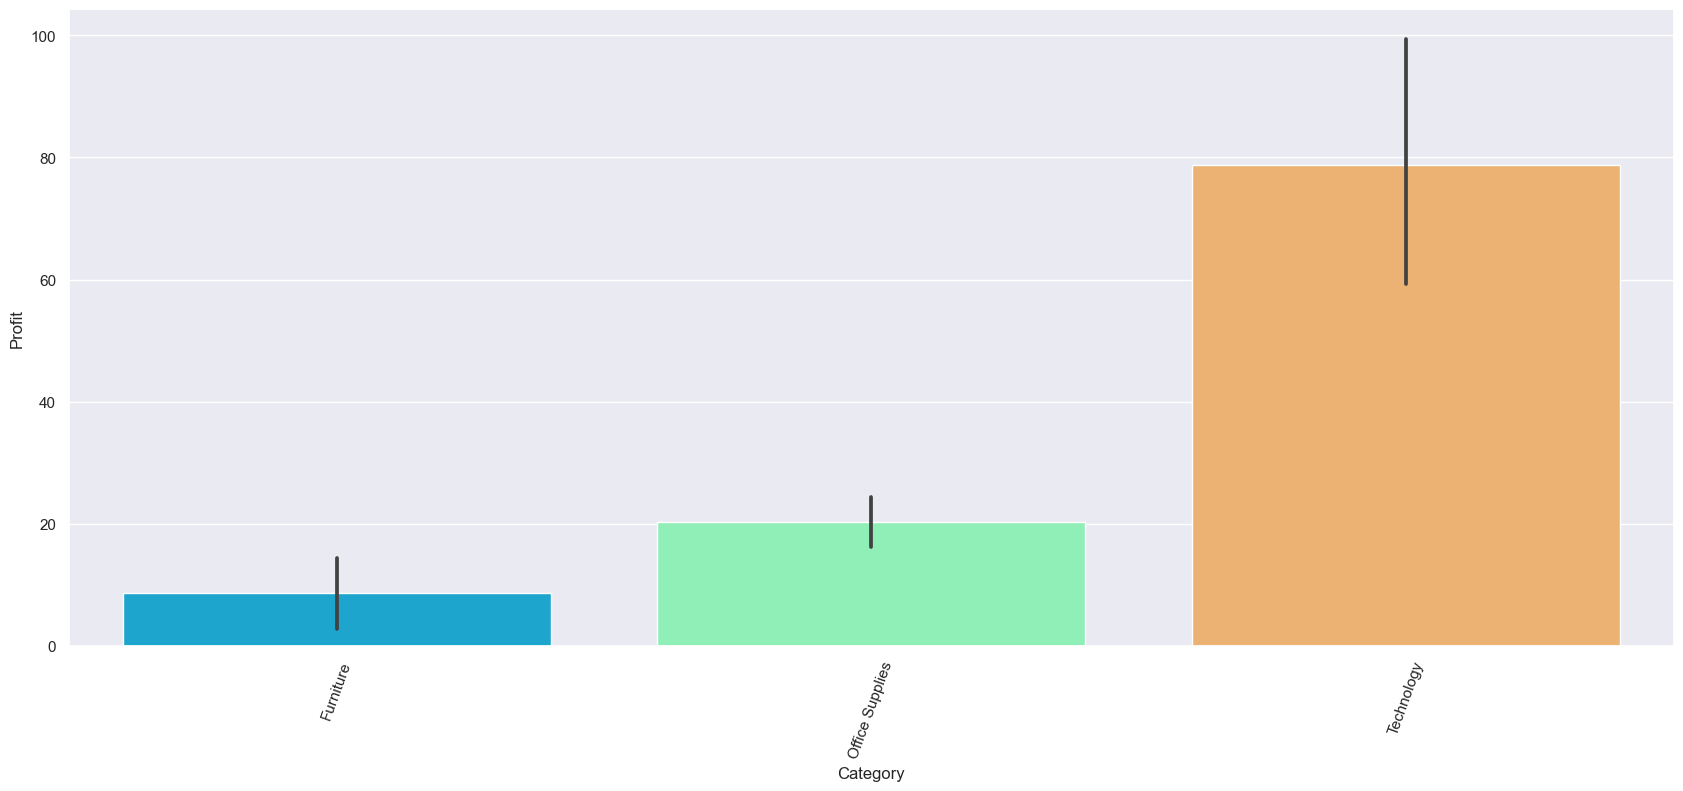

In [ ]:
#Profits in Categories
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.barplot(x="Category", y="Profit", data=df,palette='rainbow')
plt.xticks(rotation=70)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

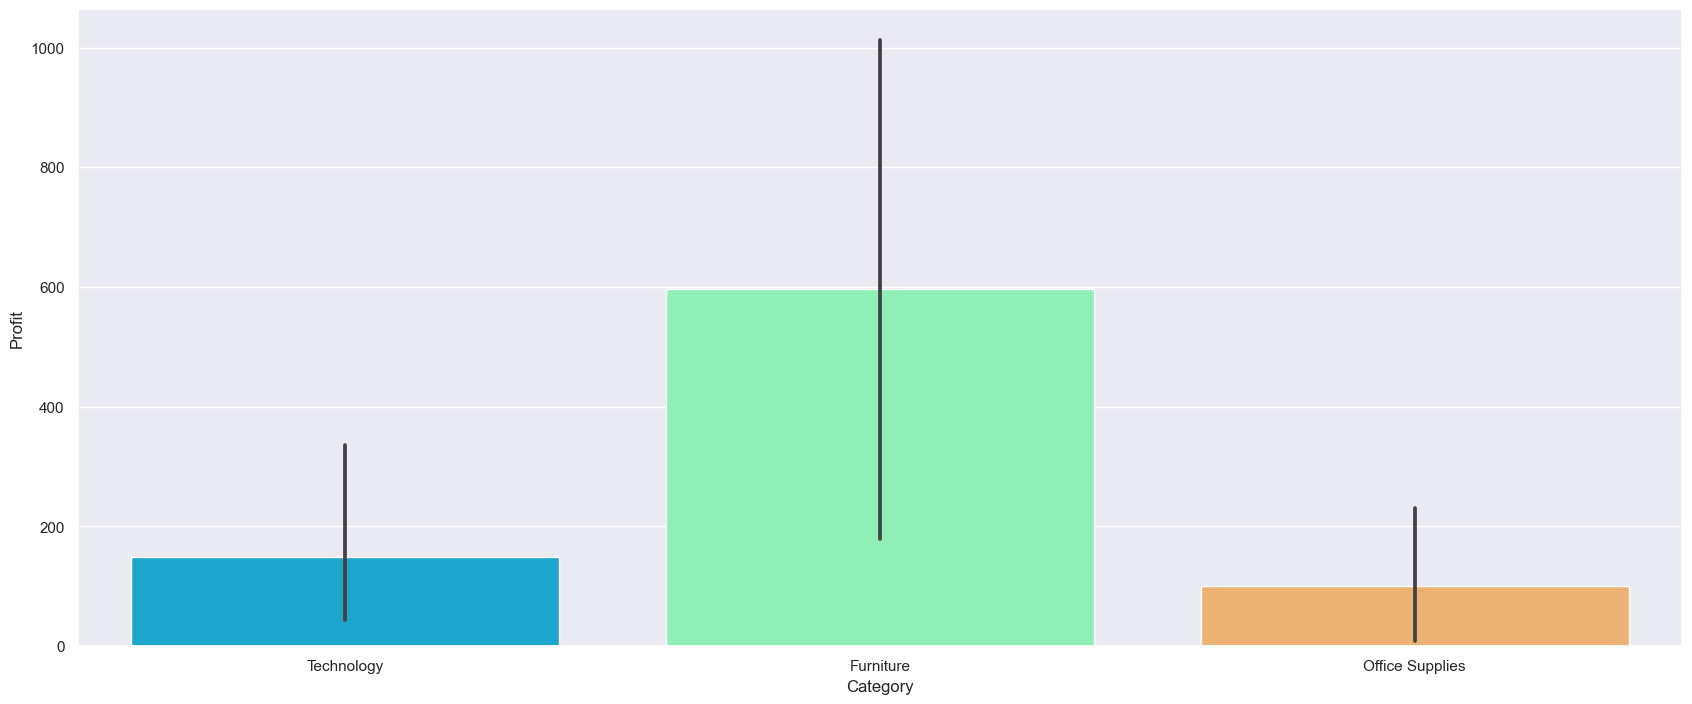

In [ ]:
#Profits in Vermont Categories
sns.barplot(x="Category", y="Profit", data=df_vermont,palette='rainbow')

<AxesSubplot:xlabel='Category', ylabel='Profit'>

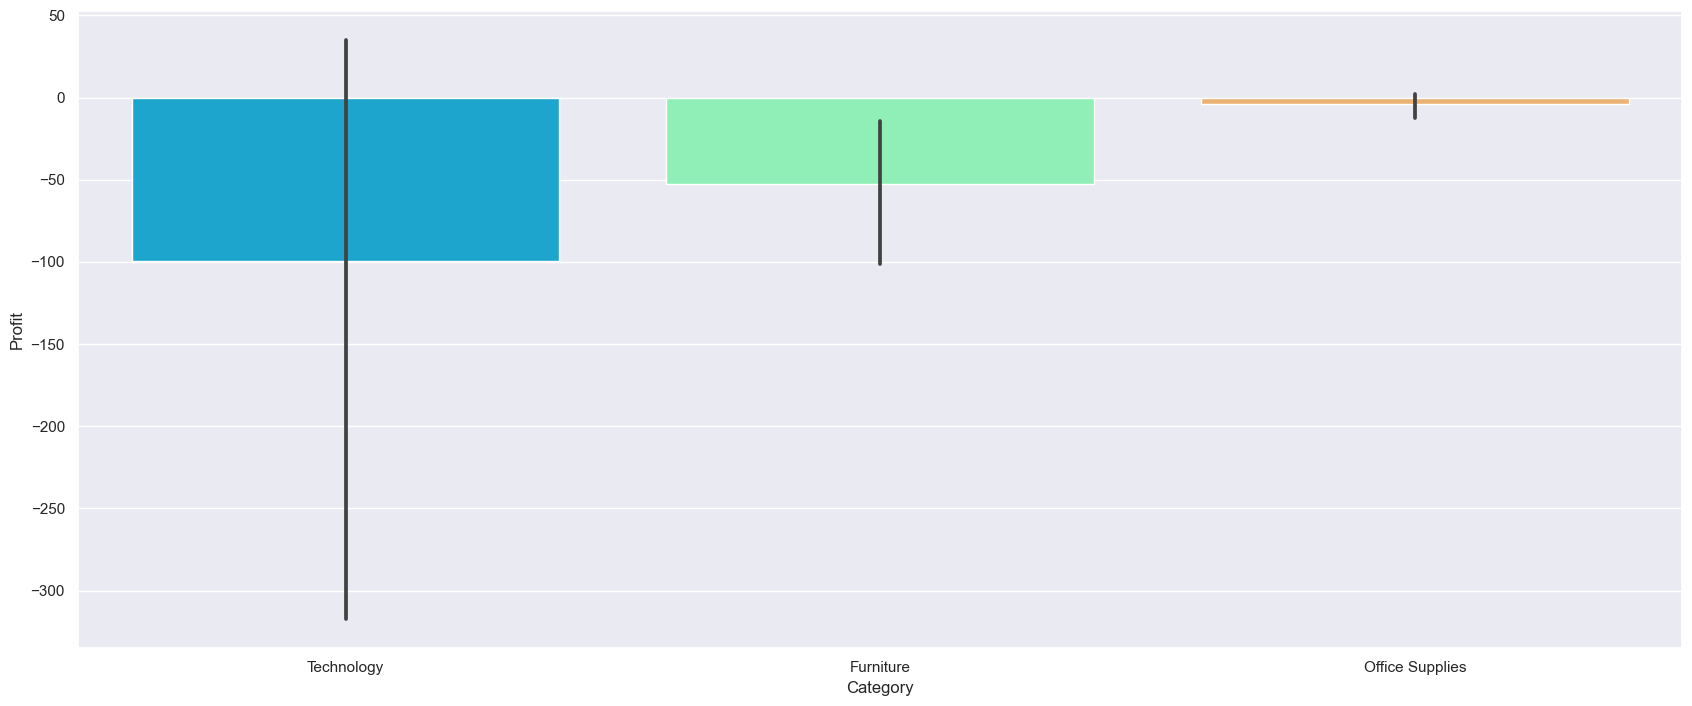

In [ ]:
#Profits in Colorado Categories
sns.barplot(x="Category", y="Profit", data=df_colorado,palette='rainbow')

In [81]:
#Ploting Segment with profit & Sales 
fig = px.bar(df, x='Segment', y='Profit', color='Sales', text_auto=True)
fig.show()

In [80]:
#DO NOT RUN ALL THE CODE THIS ONE TAKES A LOT OF RAM AND WILL LAG YOUR PC!
#Ploting States with profit & Sales 
fig = px.bar(df, x='State', y='Profit', color='Sales', text_auto=True)
fig.show()